# Coronavirus Brasil vs Mundo - Gráficos Interativos
> Gráficos e análises com comparações entre Brasil e países específicos

- toc: false
- branch: master
- badges: false
- comments: false
- author: Vinicius Bastos Gomes & Fernando Wittmann
- categories: [coronavirus]


Fonte:  https://opendata.ecdc.europa.eu/covid19/casedistribution/csv


In [91]:
#hide
!pip install plotly --upgrade

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.6.0)


In [0]:
#hide_input
#Imports
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import numpy as np; np.random.seed(1)
import seaborn as sns
sns.set(style="ticks", rc={"lines.linewidth": 1.6})
sns.set_palette('bright')
import pandas as pd
from datetime import date
import io

# Montar google drive e exportar imagens
MONTAR_GDRIVE = True


In [0]:
#hide
#URL = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"

#requests.get(URL)

In [94]:
#hide
if MONTAR_GDRIVE:
    # Montar Google Drive
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
#hide
if MONTAR_GDRIVE:
    # Abrir pasta com os arquivos
    %cd "/content/drive/My Drive/CoronaVirus Brasil"

/content/drive/My Drive/CoronaVirus Brasil


In [0]:
#hide
!rm dados.csv

In [97]:
#hide
!wget https://opendata.ecdc.europa.eu/covid19/casedistribution/csv -O dados.csv

--2020-04-07 12:17:11--  https://opendata.ecdc.europa.eu/covid19/casedistribution/csv
Resolving opendata.ecdc.europa.eu (opendata.ecdc.europa.eu)... 212.181.0.63
Connecting to opendata.ecdc.europa.eu (opendata.ecdc.europa.eu)|212.181.0.63|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/ [following]
--2020-04-07 12:17:12--  https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/
Reusing existing connection to opendata.ecdc.europa.eu:443.
HTTP request sent, awaiting response... 200 OK
Length: 475834 (465K) [application/octet-stream]
Saving to: ‘dados.csv’

dados.csv           100%[===================>] 464.68K   437KB/s    in 1.1s    

2020-04-07 12:17:13 (437 KB/s) - ‘dados.csv’ saved [475834/475834]



In [98]:
#hide
#datetime operations
todei = date.today()
today = todei.strftime("%d-%m-%Y")
today_us = todei.strftime("%Y-%m-%d")
today_us

'2020-04-07'

In [0]:
#hide

#url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{}.xlsx'.format(today_us)
#url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{}.xlsx'.format(today_us)

In [0]:
#hide

#url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'

In [0]:
#hide
data = pd.read_csv('dados.csv', encoding='latin-1',error_bad_lines=False,parse_dates=['dateRep'],dayfirst=True)


In [102]:
#hide
data2 = data[data['countriesAndTerritories'].isin(['Brazil','Italy','United_States_of_America','France','South_Korea', 'Japan','United_Kingdom','China','Spain','Argentina','India','Mexico','Germany','Czechia'])]
data2.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
286,2020-04-07,7,4,2020,74,7,Argentina,AR,ARG,44494502.0
287,2020-04-06,6,4,2020,103,3,Argentina,AR,ARG,44494502.0
288,2020-04-05,5,4,2020,186,6,Argentina,AR,ARG,44494502.0
289,2020-04-04,4,4,2020,132,3,Argentina,AR,ARG,44494502.0
290,2020-04-03,3,4,2020,0,3,Argentina,AR,ARG,44494502.0
291,2020-04-02,2,4,2020,167,7,Argentina,AR,ARG,44494502.0
292,2020-04-01,1,4,2020,0,0,Argentina,AR,ARG,44494502.0
293,2020-03-31,31,3,2020,146,4,Argentina,AR,ARG,44494502.0
294,2020-03-30,30,3,2020,75,1,Argentina,AR,ARG,44494502.0
295,2020-03-29,29,3,2020,55,2,Argentina,AR,ARG,44494502.0


In [0]:
#hide
data3 = data2[['dateRep','cases','countriesAndTerritories']]
data3.columns = ['dateRep','cases','countriesAndTerritories']

In [0]:
#hide 
#por 10 mil

pop_br = 209300000/10000
pop_it = 60590000/10000
pop_eua = 325700000/10000
pop_uk = 66040000/10000
pop_sk = 51470000/10000
pop_fr = 66770000/10000
pop_jp = 126800000/10000
pop_esp = 46530000/10000
pop_ar = 44270000/10000
pop_mex = 129200000/10000
pop_ind = 1339000000/10000
pop_ger = 82520000/10000
pop_rc = 10641000/10000
pop_ch = 1386000000/10000

In [0]:
#hide
china = data3[data3['countriesAndTerritories']=='China']
china.sort_index(ascending=False,inplace=True)
china['Cumulativo'] = china['cases'].cumsum()
china['Relativo'] = china['Cumulativo']/pop_ch
china = china[china['Cumulativo']>=50]
china.reset_index(drop=True, inplace=True)
china.drop(['cases','dateRep'],axis=1,inplace=True)

In [0]:
#hide
germany = data3[data3['countriesAndTerritories']=='Germany']
germany.sort_index(ascending=False,inplace=True)
germany['Cumulativo'] = germany['cases'].cumsum()
germany['Relativo'] = germany['Cumulativo']/pop_ger
germany = germany[germany['Cumulativo']>=50]
germany.reset_index(drop=True, inplace=True)
germany.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
italy = data3[data3['countriesAndTerritories']=='Italy']
italy.sort_index(ascending=False,inplace=True)
italy['Cumulativo'] = italy['cases'].cumsum()
italy['Relativo'] = italy['Cumulativo']/pop_it
italy = italy[italy['Cumulativo']>=50]
italy.reset_index(drop=True, inplace=True)
italy.drop(['cases','dateRep'],axis=1,inplace=True)



In [0]:
#hide
brazil = data3[data3['countriesAndTerritories']=='Brazil']
brazil.sort_index(ascending=False,inplace=True)
brazil['Cumulativo'] = brazil['cases'].cumsum()
brazil['Relativo'] = brazil['Cumulativo']/pop_br
brazil = brazil[brazil['Cumulativo']>=50]
brazil.reset_index(drop=True, inplace=True)
brazil.drop(['cases','dateRep'],axis=1,inplace=True)





In [0]:
#hide
argentina = data3[data3['countriesAndTerritories']=='Argentina']
argentina.sort_index(ascending=False,inplace=True)
argentina['Cumulativo'] = argentina['cases'].cumsum()
argentina['Relativo'] = argentina['Cumulativo']/pop_ar
argentina = argentina[argentina['Cumulativo']>=50]
argentina.reset_index(drop=True, inplace=True)
argentina.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
japan = data3[data3['countriesAndTerritories']=='Japan']
japan.sort_index(ascending=False,inplace=True)
japan['Cumulativo'] = japan['cases'].cumsum()
japan['Relativo'] = japan['Cumulativo']/pop_jp
japan = japan[japan['Cumulativo']>=50]
japan.reset_index(drop=True, inplace=True)
japan.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
france = data3[data3['countriesAndTerritories']=='France']
france.sort_index(ascending=False,inplace=True)
france['Cumulativo'] = france['cases'].cumsum()
france['Relativo'] = france['Cumulativo']/pop_fr
france = france[france['Cumulativo']>=50]
france.reset_index(drop=True, inplace=True)
france.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
south_korea = data3[data3['countriesAndTerritories']=='South_Korea']
south_korea.sort_index(ascending=False,inplace=True)
south_korea['Cumulativo'] = south_korea['cases'].cumsum()
south_korea['Relativo'] = south_korea['Cumulativo']/pop_sk
south_korea = south_korea[south_korea['Cumulativo']>=50]
south_korea.reset_index(drop=True, inplace=True)
south_korea.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
us = data3[data3['countriesAndTerritories']=='United_States_of_America']
us.sort_index(ascending=False,inplace=True)
us['Cumulativo'] = us['cases'].cumsum()
us['Relativo'] = us['Cumulativo']/pop_eua
us = us[us['Cumulativo']>=50]
us.reset_index(drop=True, inplace=True)
us.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
uk = data3[data3['countriesAndTerritories']=='United_Kingdom']
uk.sort_index(ascending=False,inplace=True)
uk['Cumulativo'] = uk['cases'].cumsum()
uk['Relativo'] = uk['Cumulativo']/pop_uk
uk = uk[uk['Cumulativo']>=50]
uk.reset_index(drop=True, inplace=True)
uk.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
spain = data3[data3['countriesAndTerritories']=='Spain']
spain.sort_index(ascending=False,inplace=True)
spain['Cumulativo'] = spain['cases'].cumsum()
spain['Relativo'] = spain['Cumulativo']/pop_esp
spain = spain[spain['Cumulativo']>=50]
spain.reset_index(drop=True, inplace=True)
spain.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mexico = data3[data3['countriesAndTerritories']=='Mexico']
mexico.sort_index(ascending=False,inplace=True)
mexico['Cumulativo'] = mexico['cases'].cumsum()
mexico['Relativo'] = mexico['Cumulativo']/pop_esp
mexico = mexico[mexico['Cumulativo']>=50]
mexico.reset_index(drop=True, inplace=True)
mexico.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
india = data3[data3['countriesAndTerritories']=='India']
india.sort_index(ascending=False,inplace=True)
india['Cumulativo'] = india['cases'].cumsum()
india['Relativo'] = india['Cumulativo']/pop_ind
india = india[india['Cumulativo']>=50]
india.reset_index(drop=True, inplace=True)
india.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
czech_Republic = data3[data3['countriesAndTerritories']=='Czechia']
czech_Republic.sort_index(ascending=False,inplace=True)
czech_Republic['Cumulativo'] = czech_Republic['cases'].cumsum()
czech_Republic['Relativo'] = czech_Republic['Cumulativo']/pop_rc
czech_Republic = czech_Republic[czech_Republic['Cumulativo']>=50]
czech_Republic.reset_index(drop=True, inplace=True)
czech_Republic.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
#tabela final
final_data=pd.concat([brazil,italy,japan,uk,us,france,south_korea,spain,argentina,india,mexico,germany,czech_Republic,china],axis=0)
final_data['Dias']=final_data.index
final_data.columns = ['Países e territórios','Casos acumulados','Relativa','Dias desde o caso número 50']


In [0]:
#hide
#add pct
brazil_dupl = brazil
brazil_dupl['razao']= brazil_dupl['Cumulativo'].pct_change()
brazil_dupl['razao']=(brazil_dupl['razao']*100).round(2)
brazil_dupl['dias']= brazil_dupl.index


In [0]:
#hide
zoom = final_data[final_data['Casos acumulados']<=2500]

<center> <h2> Gráficos de contaminação </h2> </center>




In [0]:
#hide
meio_zoom = final_data[final_data['Casos acumulados']<=5000]

Os gráficos a seguir apresentam curvas de contaminação de diversos países. Foram criados com o intuito de comparar estratégias de combate à disseminação do vírus. É importante notar que as curvas de contaminação estão amplamente relacionadas à quantidade de testes que os países tem realizado.
A seção contem duas aproximações e duas versões do gáfico completo: nas escalas aritmética e logarítmica. 

In [123]:
#hide
import plotly.express as px

fig = px.line(zoom, x="Dias desde o caso número 50", y="Casos acumulados", title='COVID-19 - Casos confirmados - {} \n Zoom até 2500 casos'.format(today),hover_data=['Países e territórios','Casos acumulados'],
              color='Países e territórios',color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
annotations= []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom'))

fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()
#fig.write_html("plots/11_letalidade.html")

In [124]:
#hide

fig = px.line(meio_zoom, x="Dias desde o caso número 50", y="Casos acumulados", title='COVID-19 - Casos confirmados - {} \n Zoom até 5000 casos'.format(today),
              color='Países e territórios',color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()
#fig.write_html("plots/11_letalidade.html")

In [125]:
#hide_input

fig = px.line(final_data, x="Dias desde o caso número 50", y="Casos acumulados", title='COVID-19 - Casos confirmados - {} \n Escala aritmética'.format(today),
              color=final_data['Países e territórios'].values,color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()
#fig.write_html("plots/11_letalidade.html")


In [126]:
#hide_input

fig = px.line(final_data, x="Dias desde o caso número 50", y="Casos acumulados", title='COVID-19 - Casos totais confirmados - {} \n Escala Logarítmica'.format(today),
              color='Países e territórios',color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})

fig.update_layout( yaxis_type="log")
fig.show()

<center> <h2> Contaminação Relativa </h2> </center>



Essa seção conta com gráficos em que o número de casos é dívidido pela população dos países para que se tenha uma ideia da proporção de infectados por país.

In [127]:
#hide_input

fig = px.line(final_data, x="Dias desde o caso número 50", y="Relativa", title='COVID-19 - Contaminação relativa  {} \nCasos a cada 10 mil habitantes - E. Aritmética' .format(today),
              color='Países e territórios',color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})

fig.update_layout()
fig.show()

In [128]:
#hide_input

fig = px.line(final_data, x="Dias desde o caso número 50", y="Relativa", color='Países e territórios',title='COVID-19 - Contaminação relativa  {} \nCasos a cada 10 mil habitantes - E. Logarítmica'.format(today),
              color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})

fig.update_layout(yaxis_type="log")
fig.show()

<center> <h2> Mortes </h2> </center>

In [0]:
#hide
mortos = data2[['dateRep','deaths','countriesAndTerritories']]
mortos.columns = ['dateRep','deaths','countriesAndTerritories']

In [0]:
#hide
mgermany = mortos[mortos['countriesAndTerritories']=='Germany']
mgermany.sort_index(ascending=False,inplace=True)
mgermany['Cumulativo'] = mgermany['deaths'].cumsum()
mgermany = mgermany[mgermany['Cumulativo']>=1]
mgermany.reset_index(drop=True, inplace=True)
mgermany.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mitaly = mortos[mortos['countriesAndTerritories']=='Italy']
mitaly.sort_index(ascending=False,inplace=True)
mitaly['Cumulativo'] = mitaly['deaths'].cumsum()
mitaly = mitaly[mitaly['Cumulativo']>=1]
mitaly.reset_index(drop=True, inplace=True)
mitaly.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
margentina = mortos[mortos['countriesAndTerritories']=='Argentina']
margentina.sort_index(ascending=False,inplace=True)
margentina['Cumulativo'] = margentina['deaths'].cumsum()
margentina = margentina[margentina['Cumulativo']>=1]
margentina.reset_index(drop=True, inplace=True)
margentina.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mbrazil = mortos[mortos['countriesAndTerritories']=='Brazil']
mbrazil.sort_index(ascending=False,inplace=True)
mbrazil['Cumulativo'] = mbrazil['deaths'].cumsum()
mbrazil = mbrazil[mbrazil['Cumulativo']>=1]
mbrazil.reset_index(drop=True, inplace=True)
mbrazil.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mjapan = mortos[mortos['countriesAndTerritories']=='Japan']
mjapan.sort_index(ascending=False,inplace=True)
mjapan['Cumulativo'] = mjapan['deaths'].cumsum()
mjapan = mjapan[mjapan['Cumulativo']>=1]
mjapan.reset_index(drop=True, inplace=True)
mjapan.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
msouth_korea = mortos[mortos['countriesAndTerritories']=='South_Korea']
msouth_korea.sort_index(ascending=False,inplace=True)
msouth_korea['Cumulativo'] = msouth_korea['deaths'].cumsum()
msouth_korea = msouth_korea[msouth_korea['Cumulativo']>=1]
msouth_korea.reset_index(drop=True, inplace=True)
msouth_korea.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mus = mortos[mortos['countriesAndTerritories']=='United_States_of_America']
mus.sort_index(ascending=False,inplace=True)
mus['Cumulativo'] = mus['deaths'].cumsum()
mus = mus[mus['Cumulativo']>=1]
mus.reset_index(drop=True, inplace=True)
mus.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mfrance = mortos[mortos['countriesAndTerritories']=='France']
mfrance.sort_index(ascending=False,inplace=True)
mfrance['Cumulativo'] = mfrance['deaths'].cumsum()
mfrance = mfrance[mfrance['Cumulativo']>=1]
mfrance.reset_index(drop=True, inplace=True)
mfrance.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
muk = mortos[mortos['countriesAndTerritories']=='United_Kingdom']
muk.sort_index(ascending=False,inplace=True)
muk['Cumulativo'] = muk['deaths'].cumsum()
muk = muk[muk['Cumulativo']>=1]
muk.reset_index(drop=True, inplace=True)
muk.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mchina = mortos[mortos['countriesAndTerritories']=='China']
mchina.sort_index(ascending=False,inplace=True)
mchina['Cumulativo'] = mchina['deaths'].cumsum()
mchina = mchina[mchina['Cumulativo']>=1]
mchina.reset_index(drop=True, inplace=True)
mchina.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mspain = mortos[mortos['countriesAndTerritories']=='Spain']
mspain.sort_index(ascending=False,inplace=True)
mspain['Cumulativo'] = mspain['deaths'].cumsum()
mspain = mspain[mspain['Cumulativo']>=1]
mspain.reset_index(drop=True, inplace=True)
mspain.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mindia = mortos[mortos['countriesAndTerritories']=='India']
mindia.sort_index(ascending=False,inplace=True)
mindia['Cumulativo'] = mindia['deaths'].cumsum()
mindia = mindia[mindia['Cumulativo']>=1]
mindia.reset_index(drop=True, inplace=True)
mindia.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mczech = mortos[mortos['countriesAndTerritories']=='Czechia']
mczech.sort_index(ascending=False,inplace=True)
mczech['Cumulativo'] = mczech['deaths'].cumsum()
mczech = mczech[mczech['Cumulativo']>=1]
mczech.reset_index(drop=True, inplace=True)
mczech.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
# Tabela final de mortes
mfinal_data=pd.concat([mbrazil,mitaly,mjapan,muk,mus,msouth_korea,mfrance,mchina,mspain,margentina,mindia,mgermany,mczech],axis=0)
mfinal_data['Dias']=mfinal_data.index
mfinal_data.columns = ['Países e territórios','Mortes', 'Dias desde a primeira morte']


In [0]:
#hide
mzoom = mfinal_data[mfinal_data['Mortes']<=100]

In [0]:
#hide
mmeio_zoom = mfinal_data[mfinal_data['Mortes']<=500]

In [146]:
#hide


fig = px.line(mzoom, x="Dias desde a primeira morte", y="Mortes",title='COVID-19 - Mortes {} \n Zoom até 100'.format(today), 
              color='Países e territórios',color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})

fig.update_layout()
fig.show()

Aqui, os gráficos das curvas de mortes em uma aproximação de até 500 e, posteriormente, os completos, nas escalas aritmética e logarítmica. 

In [147]:
#hide_input


fig = px.line(mmeio_zoom, x="Dias desde a primeira morte", y="Mortes", title='COVID-19 - Mortes {} \n Zoom até 500'.format(today),
              color='Países e territórios',color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})

fig.update_layout()
fig.show()

In [148]:
#hide_input


fig = px.line(mfinal_data, x="Dias desde a primeira morte", y="Mortes", color='Países e territórios',title='COVID-19 - Mortes  - {} \n Escala Aritmética'.format(today),
              color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})

fig.update_layout()
fig.show()

In [149]:
#hide_input


fig = px.line(mfinal_data, x="Dias desde a primeira morte", y="Mortes", title='COVID-19 - Mortes  {} \n Escala Logarítmica'.format(today),
              color='Países e territórios',color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})

fig.update_layout( yaxis_type="log")
fig.show()

In [150]:
#hide
brazil['razao']= brazil['Cumulativo'].pct_change()
brazil['razao']=(brazil['razao']*100).round(2)
brazil['dias']= brazil.index
brazil.tail(5)

,countriesAndTerritories,Cumulativo,Relativo,razao,dias
22,Brazil,7910,0.377926,15.71,22
23,Brazil,9056,0.432680,14.49,23
24,Brazil,10278,0.491065,13.49,24
25,Brazil,11130,0.531773,8.29,25
26,Brazil,12056,0.576015,8.32,26


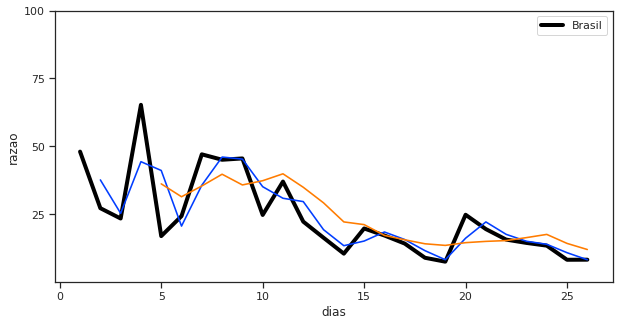

In [151]:
#hide
plt.figure(figsize=(10,5))
plt.yticks([25,50,75,100])
plt.ylim(0,100)
sns.lineplot(x='dias',y='razao',data=brazil,color='black',linewidth=4,label='Brasil')
plt.plot(brazil['razao'].rolling(2).mean(),label= 'MA 2 days')
plt.plot(brazil['razao'].rolling(5).mean(),label= 'MA 5 days')

#plt.savefig("plots/pct_change.png")


<center> <h2> Letalidade </h2> </center>

O gráfco a seguir aponta o número de mortes dividido pelo número de casos confirmados. É importantíssimo notar a grande dependência desses números da quantidade de testes disponíveis. Quanto mais testes realizados, mais confiáveis os dados.

In [152]:
czech_Republic

,countriesAndTerritories,Cumulativo,Relativo
0,Czechia,63,0.059205
1,Czechia,94,0.088338
2,Czechia,116,0.109012
3,Czechia,150,0.140964
4,Czechia,214,0.201109
5,Czechia,298,0.280049
6,Czechia,344,0.323278
7,Czechia,434,0.407856
8,Czechia,522,0.490555
9,Czechia,694,0.652194


In [0]:
#hide
let_brazil =((mbrazil['Cumulativo'].values[-1]/brazil['Cumulativo'].values[-1])*100).round(2)
let_us = ((mus['Cumulativo'].values[-1]/us['Cumulativo'].values[-1])*100).round(2)
let_uk = ((muk['Cumulativo'].values[-1]/uk['Cumulativo'].values[-1])*100).round(2)
let_italy = ((mitaly['Cumulativo'].values[-1]/italy['Cumulativo'].values[-1])*100).round(2)
let_spain = ((mspain['Cumulativo'].values[-1]/spain['Cumulativo'].values[-1])*100).round(2)
let_japan = ((mjapan['Cumulativo'].values[-1]/japan['Cumulativo'].values[-1])*100).round(2)
let_arg = ((margentina['Cumulativo'].values[-1]/argentina['Cumulativo'].values[-1])*100).round(2)
let_fran = ((mfrance['Cumulativo'].values[-1]/france['Cumulativo'].values[-1])*100).round(2)
let_ind = ((mindia['Cumulativo'].values[-1]/india['Cumulativo'].values[-1])*100).round(2)
let_rc = ((mczech['Cumulativo'].values[-1]/czech_Republic['Cumulativo'].values[-1])*100).round(2)
let_ger = ((mgermany['Cumulativo'].values[-1]/germany['Cumulativo'].values[-1])*100).round(2)
let_ch = ((mchina['Cumulativo'].values[-1]/china['Cumulativo'].values[-1])*100).round(2)


let= [let_brazil,let_us,let_uk,let_italy,let_spain,let_fran,let_japan,let_arg,let_ind,let_ger,let_ch,let_rc]
paises = ['Brasil','EUA', 'Reino Unido','Itália','Espanha','França','Japão','Argentina','Índia','Alemanha','China','República Tcheca']


In [154]:
#hide
letality = pd.DataFrame()
letality['Países'] = paises
letality['Letalidade %'] = let
letality.tail(3)


,Países,Letalidade %
9,Alemanha,1.62
10,China,4.03
11,República Tcheca,1.62


In [155]:
#hide_input

fig = px.bar(letality,x="Letalidade %", y='Países', color='Países',orientation='h',
             color_discrete_sequence=px.colors.qualitative.G10,title="Letalidade - {}".format(today))#.update_yaxes(categoryorder='total dscending')
fig.update_layout(yaxis_type = 'category',)
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})




In [156]:
#hide
pro_bra = data2[data2['countriesAndTerritories']=='Brazil']
pro_bra['dateRep'] = pd.to_datetime(pro_bra['dateRep'],infer_datetime_format=True)
pro_bra.sort_values('dateRep',inplace=True)

pro_bra['death_cum'] = pro_bra['deaths'].cumsum()
pro_bra['case_cum'] = pro_bra['cases'].cumsum()

pro_bra.drop(['day', 'month','year',"geoId",'countryterritoryCode',"popData2018",'countriesAndTerritories'], axis = 1,inplace=True)
pro_bra.tail(4)

,dateRep,cases,deaths,death_cum,case_cum
1217,2020-04-04,1146,60,359,9056
1216,2020-04-05,1222,73,432,10278
1215,2020-04-06,852,54,486,11130
1214,2020-04-07,926,67,553,12056


In [157]:
#hide
pro_bra['Alemanha'] = pro_bra['death_cum']/let_ger*100
pro_bra = pro_bra[pro_bra['dateRep']>='2020-03-17']
pro_bra = pro_bra[pro_bra['dateRep']<=today]

pro_bra.sort_values('dateRep',ascending=False)
pro_bra.tail(3)

,dateRep,cases,deaths,death_cum,case_cum,Alemanha
1216,2020-04-05,1222,73,432,10278,26666.666667
1215,2020-04-06,852,54,486,11130,30000.000000
1214,2020-04-07,926,67,553,12056,34135.802469


O gráfico abaixo representa uma estimativa simples da quantidade de casos atualmente no Brasil. Uma vez que a baixa quantidade de testes tem levado os números a uma subnotificação, o cálculo foi realizado com base no número de óbitos registrados por COVID-19 no Brasil e na taxa de letalidade de países como a Alemanha e a Coréia do Sul, países que tem testado massivamente sua população. Desse modo os números são os seguintes:


In [158]:
#hide_input
print("Número atual de casos registrados no Brasil hoje: "+ str(pro_bra.iloc[-1,-3])  )
print("Estimativa de casos no Brasil hoje caso a letalidade seja próxima à da Alemanha: "+ str(int(pro_bra.iloc[-1,-2]))  )
print("Estimativa de casos no Brasil hoje caso a letalidade seja próxima à da Coréia do Sul: "+ str(int(pro_bra.iloc[-1,-1]))  )

Número atual de casos registrados no Brasil hoje: 553
Estimativa de casos no Brasil hoje caso a letalidade seja próxima à da Alemanha: 12056
Estimativa de casos no Brasil hoje caso a letalidade seja próxima à da Coréia do Sul: 34135


In [159]:
#hide
pro_bra.tail(1)

,dateRep,cases,deaths,death_cum,case_cum,Alemanha
1214,2020-04-07,926,67,553,12056,34135.802469


In [160]:
#hide_input
import plotly.graph_objects as go
pro_bra = pro_bra[pro_bra['dateRep']<=today_us]
fig = go.Figure()
fig.add_trace(go.Scatter(x=pro_bra['dateRep'], y=pro_bra['case_cum'], name='Brasil registrado',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=pro_bra['dateRep'], y=pro_bra['Alemanha'], name='Projeção Alemanha',
                         line=dict(color='blue', width=2)))


fig.update_layout(title='Projeção de casos no Brasil baseados nas taxas de letalidade da Alemanha',
                   xaxis_title='Data',
                   yaxis_title='Projeção')

In [161]:
#hide
hongkong, southkorea, taiwan

NameError: ignored

In [0]:
#hide
data2.sort_values(["countriesAndTerritories",'dateRep'],inplace=True,ascending=True)
fig = px.bar(data2,x="countriesAndTerritories", y='cases', color='countriesAndTerritories',orientation='v',
             color_discrete_sequence=px.colors.qualitative.G10,title="Letalidade - {}".format(today),animation_frame='dateRep',range_y=[0,10000])#.update_yaxes(categoryorder='total dscending')
fig.update_layout(yaxis_type = 'category')
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})


In [0]:
#hide
import plotly.express as px

fig = px.line(final_data, x="Dias desde o caso número 50", y="Relativa", color='Países e territórios',color_discrete_sequence=px.colors.qualitative.G10,title="Curvas dos estados brasileiros",animation_frame='Dias desde o caso número 50',animation_group='Dias desde o caso número 50')
fig.update_layout( yaxis_type="log")
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})

fig.show()
#fig.write_html("plots/11_letalidade.html")

In [0]:
#hide
mfinal_data

In [0]:
#hide
italy
x = italy.shift(-7)
x.head(4)

In [0]:
#hide
italy.head(4)

In [0]:
#hide
italy['Shifted'] = x['Cumulativo']

In [0]:
#hide
brasil = list(brazil['Cumulativo'])
x = list(mbrazil['Cumulativo'])
y = list(mbrazil.index)
print(x)
print(y)
print(brasil)

In [0]:
#hide

data2

In [0]:
#hide
data2.sort_values(['dateRep','countriesAndTerritories'],inplace=True)


In [0]:
#hide
data2['dateRep'] = pd.to_datetime(data2['dateRep'],dayfirst=True)


In [0]:
#hide
datax = data2.groupby(['countriesAndTerritories','dateRep']).agg({'deaths': 'sum'})
datax

In [0]:
#hide
datax.reset_index(level=[0,1],inplace=True)
datax

In [0]:
#hide
datax['dateRep'] = datax['dateRep'].dt.strftime('%Y-%m-%d')
datax

In [0]:
#hide
datax.sort_values(['dateRep','countriesAndTerritories'],inplace=True)

In [0]:
#hide
fig = px.bar(datax, x='countriesAndTerritories', y="deaths", color="countriesAndTerritories",
  animation_frame="dateRep", animation_group="countriesAndTerritories", range_y=[0,4000])
fig.show()